# Classical-4f-system

![](https://www.researchgate.net/profile/Oscar-Garcia-Perez/publication/317379652/figure/fig2/AS:732624033177604@1551682589757/Optical-scheme-of-a-4f-system.png)

The aperture of a 4f system is usually placed in the Fourier plane of the system, that is, at the 2f position. The physical size of the spatial aperture can control the spatial frequency passing through. Therefore, the 4f system is often used for spatial filtering in optical systems, which can be described as:

$$
I = |\mathcal{F}^{-1}\left\{A(\mathcal{F}\{O\})\right\}|^2
$$


In [1]:
import pyoptics
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

As the optical path shows above, we can define the optical elements inside the optical system:
- wavefront
- lens1, focal length set to 5e-3 m
- aperture, radius set to 1e-5 m
- lens2, the same lens as lens1
- lens3, the same lens as lens1

In [2]:
sourceLayer = pyoptics.GaussianBeamLayer(L=512 * 1e-6, N=512, wavelength=532e-9, radius=15e-6)
lensLayer = pyoptics.LensLayer(L=512 * 1e-6, N=512, wavelength=532e-9, focal_length=5e-3)
apertureLayer1 = pyoptics.ApertureLayer(L=512 * 1e-6, N=512, wavelength=532e-9, radius=100e-6)
lensLayer2 = pyoptics.LensLayer(L=512 * 1e-6, N=512, wavelength=532e-9, focal_length=5e-3)
apertureLayer2 = pyoptics.ApertureLayer(L=512 * 1e-6, N=512, wavelength=532e-9, radius=20e-6)
lensLayer3 = pyoptics.LensLayer(L=512 * 1e-6, N=512, wavelength=532e-9, focal_length=5e-3)

Layers_list = [[sourceLayer], [lensLayer], [apertureLayer1], [lensLayer2], [apertureLayer2], [lensLayer3]]
Distance_list = [5e-3, 5e-3, 5e-3, 5e-3, 5e-3,5e-3]

four_f_system = pyoptics.OpticsSystem(Layers_list, Distance_list)
z = 30e-3
# z(m): propagation distance along Z axis
z_step = 1e-4
# z_step: simulation step of Z axis

# simulation of light filed propagation along Z axis
number_of_z_step = int(z / z_step)

field_along_z = four_f_system.field_propagation_along_z(z, z_step)
YZ_field = np.abs(field_along_z[:, 512 // 2])
z_total = np.arange(0, number_of_z_step) * z_step

KeyboardInterrupt: 

The system contains two 4f system:
- spatial filter to a gaussian beam wavefront
- spatial filter to a planar wavefront

The diffraction pattern on the observation plan is caused by the limited radius of apertureLayer2

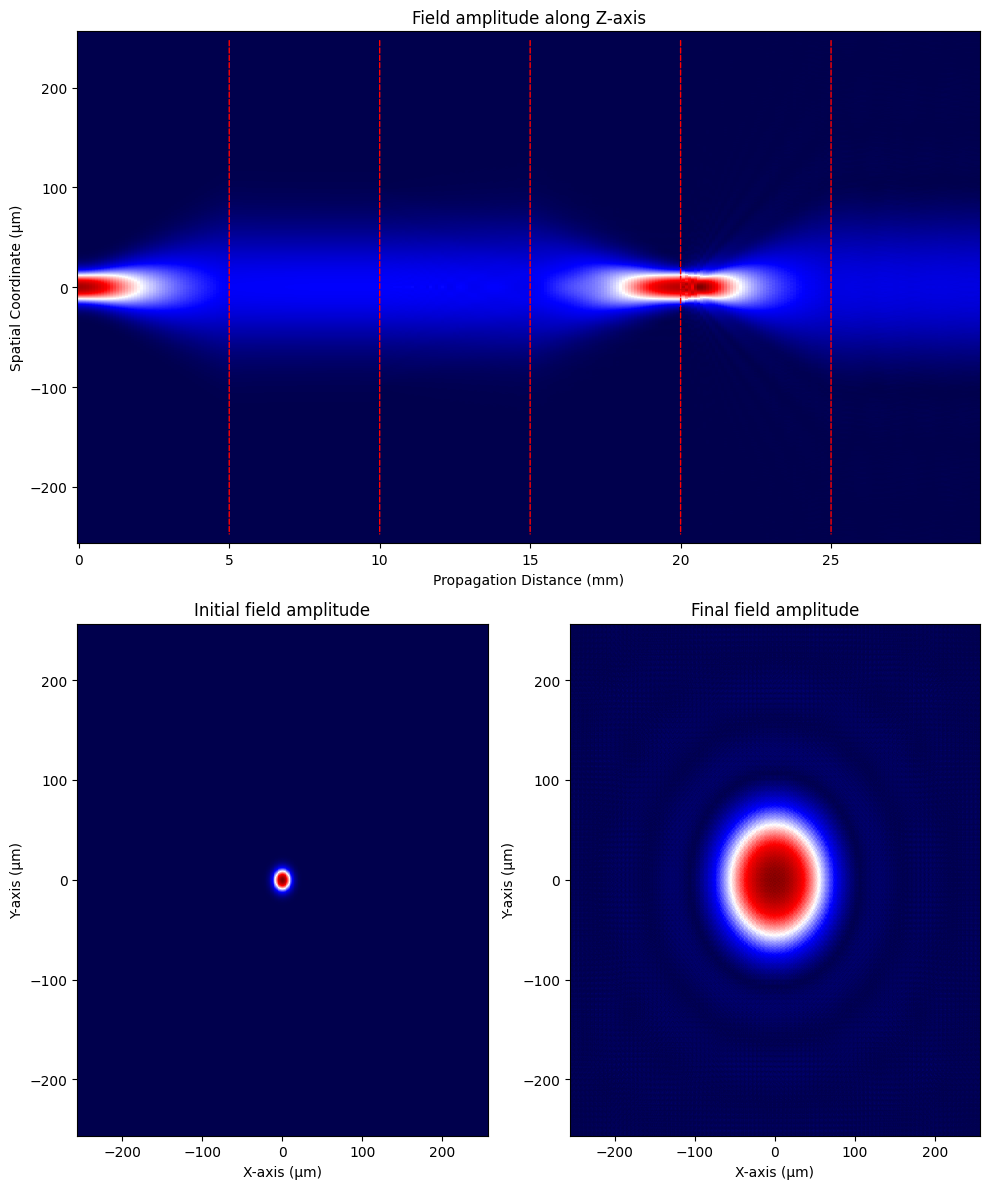

In [3]:
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, :])
ax1.pcolormesh(z_total * 10 ** 3, sourceLayer.x * 10 ** 6, YZ_field.T, cmap='seismic')

for i in range(len(Layers_list)-1):
    ax1.annotate('', xy=(sum(Distance_list[0:i+1])*10**3, -250), xytext=(sum(Distance_list[0:i+1])*10**3, 250),
                  arrowprops=dict(arrowstyle='-', linestyle='--', color='red'))

ax1.set_xlabel('Propagation Distance (mm)')
ax1.set_ylabel('Spatial Coordinate (μm)')
ax1.set_title('Field amplitude along Z-axis')

ax2 = fig.add_subplot(gs[1, 0])
ax2.pcolormesh(sourceLayer.X * 10 ** 6, sourceLayer.Y * 10 ** 6,
               np.abs(sourceLayer.field) ** 2, cmap='seismic')
ax2.set_xlabel('X-axis (μm)')
ax2.set_ylabel('Y-axis (μm)')
ax2.set_title('Initial field amplitude')

ax3 = fig.add_subplot(gs[1, 1])
ax3.pcolormesh(sourceLayer.X * 10 ** 6, sourceLayer.Y * 10 ** 6,
               np.abs(four_f_system.field_propagation(z)), cmap='seismic')
ax3.set_xlabel('X-axis (μm)')
ax3.set_ylabel('Y-axis (μm)')
ax3.set_title('Final field amplitude')

plt.tight_layout()
plt.show()